# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work
### (5 Marks)

*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Daniel | Polania | Daniel Polania 2024-09-25 | 10 | 33.3% |
| Member 2: | Wutikeer | Tuerxun | Wutikeer Tuerxun 2024-09-25 | 10 | 33.3% |
| Member 3: | Mohammadamir | Zarpanahfard | Mohammadamir Zarpanahfard 2024-09-25 | 10 | 33.3% |



## Part 1: Printing to the Console
### (6 Marks)

In [ ]:
# In the space below, please print "Hello, World! Welcome to the Student Gradebook Management System."
# (1 mark)
print("Hello, World! Welcome to the Student Gradebook Management System.")

Hello, World! Welcome to the Student Gradebook Management System.


In [ ]:
# Fill in your information using the defined variables below:
# (1 mark)
lab_group_number = '8'
intake_year = '2024'
intake_semester = "" #"Fall" or "Winter"

# Using f-strings and the variables above, print "This is implemented by Group <lab_group_number>, for ENGG680 <intake_semester> of <intake_year>"
# (2 marks)
print(f"This is implemented by Group {lab_group_number}, for ENGG680 {intake_semester} of {intake_year}")

This is implemented by Group 8, for ENGG680  of 2024


In [ ]:
# Use indexing to print "The subjects involved in this grading system is English and Math." using "subjects" below.
# (2 marks)
subjects = ("English", "Math")
print(f"The subjects involved in this grading system is {subjects[0]} and {subjects[1]}.")

The subjects involved in this grading system is English and Math.


## Part 2: Using Pandas for Data Management and Analytics
### (20 marks)

In [2]:
# In the space below, please import the Pandas library
# (1 mark)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/engg680_2024_fall/Lab_Assigment1/

Mounted at /content/drive
/content/drive/MyDrive/engg680_2024_fall/Lab_Assigment1


In [3]:
# Load the student grade CSV files into DataFrames using the defined variables
# (2 marks
df_english = pd.read_csv('studentGrades_English (1).csv')
df_math = pd.read_csv('studentGrades_Math.csv')

In [4]:
# Merging the DataFrames on 'studentID'
df_studentGrades = pd.merge(df_english, df_math, on='studentID', suffixes=('_English', '_Math'))

In [5]:
# Take a look at the data contained in the csv files. Why is studentID chosen as the key? Answer: Both .csv files have the StudentID Column and we want to organize the data base on that column.
# (1 mark)
print(df_studentGrades)

   firstName_English lastName_English  studentID  grade_English  \
0               Emma            Smith      10959             95   
1             Sophia         Robinson      75175             88   
2               Emma           Taylor      42257             87   
3              David         Robinson      55148             86   
4            Stephen            Curry      30303             90   
5           Isabella         Thompson      72824             88   
6            Jasmine            Smith      70385             84   
7              James            Jones      87707             76   
8              Sarah            Swift      61026             80   
9               Anne            Clark      90449             82   
10              Ryan           Thomas      62137             92   
11            Daniel            White      25477             91   
12              Sara              Doe      47991             98   
13           Matthew            White      25376             8

In [6]:
# Let's calculate the average GPA across the two classes for each student
df_studentGrades['GPA'] = df_studentGrades[['grade_English', 'grade_Math']].mean(axis=1)

# Now let's check the data! In the space below, please use the .head method to display the dataframe.
# (1 mark)
df_studentGrades.head()


,firstName_English,lastName_English,studentID,grade_English,firstName_Math,lastName_Math,grade_Math,GPA
0,Emma,Smith,10959,95,Emma,Smith,90,92.5
1,Sophia,Robinson,75175,88,Sophia,Robinson,95,91.5
2,Emma,Taylor,42257,87,Emma,Taylor,85,86.0
3,David,Robinson,55148,86,David,Robinson,87,86.5
4,Stephen,Curry,30303,90,Stephen,Curry,88,89.0


In [7]:
# Do you notice a problem? The rows for first name and last name have been duplicated!
# .drop(columns=['<column_name1>','<column_name2>'] is a Pandas method that can be used to drop columns.
# In the space below, drop the first name and last name associated with the math .csv file.
# (2 mark)
df_studentGrades = df_studentGrades.drop(columns=['firstName_Math','lastName_Math'])

In [8]:
# Let's display the data again. Use an appropriate method (hint: already used before)
# (1 mark)
df_studentGrades.head()

,firstName_English,lastName_English,studentID,grade_English,grade_Math,GPA
0,Emma,Smith,10959,95,90,92.5
1,Sophia,Robinson,75175,88,95,91.5
2,Emma,Taylor,42257,87,85,86.0
3,David,Robinson,55148,86,87,86.5
4,Stephen,Curry,30303,90,88,89.0


In [9]:
# Let's also rename the first and last names appropriately.
# Complete the code in the space below by replacing "<>" with the proper column name
# (1 mark)

df_studentGrades = df_studentGrades.rename(columns={
    'firstName_English': 'firstName',
    'lastName_English': 'lastName',
    'grade_English': 'englishGrade',
    'grade_Math': 'mathGrade'
    })

In [10]:
# Now let's find out some statistics about our student grades!
# Please use an appropriate Pandas method in the space below to display statistical values like
# mean, standard deviation, min, max, and others.
# (1 mark)
df_studentGrades.describe()

,studentID,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.000000,14.00000
mean,54086.714286,86.928571,88.571429,87.75000
std,24610.266586,6.145221,5.918865,3.63609
min,10959.000000,76.000000,79.000000,82.00000
25%,33291.500000,82.500000,85.250000,84.50000
50%,58087.000000,87.500000,87.500000,89.00000
75%,72214.250000,90.750000,91.500000,90.50000
max,90449.000000,98.000000,99.000000,92.50000


In [11]:
# Do you notice a problem?
# Some statistics are not relevant. The average of studentIDs have no meaning in reality!
# Let's typecast each column appropriately so as to only get meaningful statistics.
# In the code below, replace '<>' by choosing between 'str' for string or 'float' for float
# to properly typecast each column.
# (3 marks)
df_studentGrades['studentID'] = df_studentGrades['studentID'].astype('str')
df_studentGrades['firstName'] = df_studentGrades['firstName'].astype('str')
df_studentGrades['lastName'] = df_studentGrades['lastName'].astype('str')
df_studentGrades['englishGrade'] = df_studentGrades['englishGrade'].astype('float')
df_studentGrades['mathGrade'] = df_studentGrades['mathGrade'].astype('float')
df_studentGrades['GPA'] = df_studentGrades['GPA'].astype('float')

In [12]:
# Now let's see our statistics!
df_studentGrades.describe()

,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.00000
mean,86.928571,88.571429,87.75000
std,6.145221,5.918865,3.63609
min,76.000000,79.000000,82.00000
25%,82.500000,85.250000,84.50000
50%,87.500000,87.500000,89.00000
75%,90.750000,91.500000,90.50000
max,98.000000,99.000000,92.50000


In [13]:
# Now sort the merged dataframe so that it is in descending order based on GPA, and print it
# (1 mark)
df_studentsGPASorted = df_studentGrades.sort_values(by='GPA', ascending=False)
print(df_studentsGPASorted)

   firstName  lastName studentID  englishGrade  mathGrade   GPA
0       Emma     Smith     10959          95.0       90.0  92.5
12      Sara       Doe     47991          98.0       86.0  92.0
1     Sophia  Robinson     75175          88.0       95.0  91.5
9       Anne     Clark     90449          82.0       99.0  90.5
10      Ryan    Thomas     62137          92.0       89.0  90.5
4    Stephen     Curry     30303          90.0       88.0  89.0
8      Sarah     Swift     61026          80.0       98.0  89.0
11    Daniel     White     25477          91.0       87.0  89.0
3      David  Robinson     55148          86.0       87.0  86.5
2       Emma    Taylor     42257          87.0       85.0  86.0
7      James     Jones     87707          76.0       92.0  84.0
5   Isabella  Thompson     72824          88.0       79.0  83.5
13   Matthew     White     25376          80.0       85.0  82.5
6    Jasmine     Smith     70385          84.0       80.0  82.0


In [14]:
# If we wanted to access the student with the highest gpa based on df_studentsGPASorted,
# does .iloc or .loc make more sense and why?
# (2 marks)
df_studentsGPASorted.iloc[0]
# ANSWER: .iloc makes more sense in this case, it is used for integer-based indexing. Since the DataFrame is sorted by GPA in descending order, the student with the highest GPA will be at the first position (index 0) in the sorted DataFrame.

,0
firstName,Emma
lastName,Smith
studentID,10959
englishGrade,95.0
mathGrade,90.0
GPA,92.5


In [15]:
# Now using the method you specified, assign the variable below to the row containing the student with the highest GPA
# (1 mark)
top_student = df_studentsGPASorted.iloc[0]

In [16]:
# Now print the student first name and last name with the highest GPA in this format:
# "The student with the highest GPA is <firstName> <lastName> with a GPA of <GPA>"
# (1 mark)
print(f"The student with the highest GPA is {top_student['firstName']} {top_student['lastName']} with a GPA of {top_student['GPA']}")

The student with the highest GPA is Emma Smith with a GPA of 92.5


In [17]:
# We can use logical expressions to filter and print data. For example, let's print the students with math grades higher than 90:
df_mathGrade_over90 = df_studentsGPASorted[df_studentsGPASorted['mathGrade'] > 90]
print(df_mathGrade_over90)

  firstName  lastName studentID  englishGrade  mathGrade   GPA
1    Sophia  Robinson     75175          88.0       95.0  91.5
9      Anne     Clark     90449          82.0       99.0  90.5
8     Sarah     Swift     61026          80.0       98.0  89.0
7     James     Jones     87707          76.0       92.0  84.0


In [18]:
# Now print the students whos GPA are lower than 85
# (2 marks)
df_mathGrade_under85 = df_studentsGPASorted[df_studentsGPASorted['GPA']< 85]
print(df_mathGrade_under85)

   firstName  lastName studentID  englishGrade  mathGrade   GPA
7      James     Jones     87707          76.0       92.0  84.0
5   Isabella  Thompson     72824          88.0       79.0  83.5
13   Matthew     White     25376          80.0       85.0  82.5
6    Jasmine     Smith     70385          84.0       80.0  82.0


## Part 3: More Data Analytics using Pandas
### (20 marks)

In [19]:
# Select the column 'grade' from the original English grade dataset and print it
# (1 mark)

df_english = pd.read_csv('studentGrades_English (1).csv')
print(df_english['grade'])

0     95
1     88
2     87
3     86
4     90
5     88
6     84
7     76
8     80
9     82
10    92
11    91
12    98
13    80
Name: grade, dtype: int64


In [20]:
# Select the column 'GPA' from the df_studentGrades and print it
# (1 mark)
df_studentGradesGPA = df_studentGrades['GPA']
print(df_studentGradesGPA)

0     92.5
1     91.5
2     86.0
3     86.5
4     89.0
5     83.5
6     82.0
7     84.0
8     89.0
9     90.5
10    90.5
11    89.0
12    92.0
13    82.5
Name: GPA, dtype: float64


In [21]:
# What is the data type of grade from the English grade dataset?
# (0.5 mark)
print(df_english["grade"].dtypes)

# What is the data type of GPA from the merged dataset?
# (0.5 mark)
print(df_studentGrades["GPA"].dtypes)

# Is it different? Why?
# (1 mark)
# Yes, it is different. Grades are recorded as integers, while GPA is calculated on a scale that includes decimal points.

int64
float64


In [22]:
# Load the student homeroom CSV file into a DataFrame using the following variable name
# (1 mark)
df_homeroom = pd.read_csv('studentHomerooms.csv')
print(df_homeroom)

   firstName  lastName  studentID  homeRoom
0       Emma     Smith      10959       313
1     Sophia  Robinson      75175       311
2       Emma    Taylor      42257       311
3      David  Robinson      55148       313
4    Stephen     Curry      30303       313
5   Isabella  Thompson      72824       311
6    Jasmine     Smith      70385       313
7      James     Jones      87707       313
8      Sarah     Swift      61026       311
9       Anne     Clark      90449       311
10      Ryan    Thomas      62137       313
11    Daniel     White      25477       311
12      Sara       Doe      47991       311
13   Matthew     White      25376       313


In [27]:
# Merge the studentHomerooms with the merged dataset. Make sure that the key you are joining on are the same typecast for both datasets.
# Also ensure that there are no redundant columns, and finally display the first few rows.
# Hint: try joining on more than one column to avoid having to drop redundant columns, ie. on=['studentID', '<ColumnA>', '<ColumnB>'] ...
# (5 marks)
df_studentGrades['studentID'] = df_studentGrades['studentID'].astype(str)
df_studentGrades['firstName'] = df_studentGrades['firstName'].astype(str)
df_studentGrades['lastName'] = df_studentGrades['lastName'].astype(str)
df_homeroom['studentID'] = df_homeroom['studentID'].astype(str)
df_homeroom['firstName'] = df_homeroom['firstName'].astype(str)
df_homeroom['lastName'] = df_homeroom['lastName'].astype(str)
df_studentInfo = pd.merge(df_studentGrades, df_homeroom, on=['studentID', 'firstName', 'lastName'])
print(df_studentInfo.head())




  firstName  lastName studentID  englishGrade  mathGrade   GPA  homeRoom
0      Emma     Smith     10959          95.0       90.0  92.5       313
1    Sophia  Robinson     75175          88.0       95.0  91.5       311
2      Emma    Taylor     42257          87.0       85.0  86.0       311
3     David  Robinson     55148          86.0       87.0  86.5       313
4   Stephen     Curry     30303          90.0       88.0  89.0       313


In [28]:
# The code below calculates the mean of each homeroom class.
df_grouped = df_studentInfo.groupby('homeRoom')['GPA'].mean()
print(df_grouped)

# Which homeroom has a higher GPA?
# (1 mark)
df_grouped.iloc[1]

homeRoom
311    88.785714
313    86.714286
Name: GPA, dtype: float64


86.71428571428571

In [29]:
# Now let's work with multiple sorts. The .sort_values() method can sort by multiple columns, meaning you can specify a primary column and a secondary column for sorting.
# For example, by=['ColumnA', 'ColumnB'] will first sort by ColumnA and then by ColumnB.
# Create and print a DataFrame, df_studentsGPASorted_homeroom, which is sorted by homeRoom and then by GPA, both in descending order.
# (3 mark)
df_studentsGPASorted_homeroom = df_studentInfo.sort_values(by=['homeRoom', 'GPA'], ascending=False)
print(df_studentsGPASorted_homeroom)

   firstName  lastName studentID  englishGrade  mathGrade   GPA  homeRoom
0       Emma     Smith     10959          95.0       90.0  92.5       313
10      Ryan    Thomas     62137          92.0       89.0  90.5       313
4    Stephen     Curry     30303          90.0       88.0  89.0       313
3      David  Robinson     55148          86.0       87.0  86.5       313
7      James     Jones     87707          76.0       92.0  84.0       313
13   Matthew     White     25376          80.0       85.0  82.5       313
6    Jasmine     Smith     70385          84.0       80.0  82.0       313
12      Sara       Doe     47991          98.0       86.0  92.0       311
1     Sophia  Robinson     75175          88.0       95.0  91.5       311
9       Anne     Clark     90449          82.0       99.0  90.5       311
8      Sarah     Swift     61026          80.0       98.0  89.0       311
11    Daniel     White     25477          91.0       87.0  89.0       311
2       Emma    Taylor     42257      

In [33]:
# Do you notice a problem with the indices? They are basically meaningless now that we have sorted by homeroom and GPA.

# The code below changes the index of the dataframe so that it is more intuitive.
df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1
df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])

print(df_studentsGPASorted_homeroom)

         firstName  lastName studentID  englishGrade  mathGrade   GPA  \
newIndex                                                                
313-1         Emma     Smith     10959          95.0       90.0  92.5   
313-2         Ryan    Thomas     62137          92.0       89.0  90.5   
313-3      Stephen     Curry     30303          90.0       88.0  89.0   
313-4        David  Robinson     55148          86.0       87.0  86.5   
313-5        James     Jones     87707          76.0       92.0  84.0   
313-6      Matthew     White     25376          80.0       85.0  82.5   
313-7      Jasmine     Smith     70385          84.0       80.0  82.0   
311-1         Sara       Doe     47991          98.0       86.0  92.0   
311-2       Sophia  Robinson     75175          88.0       95.0  91.5   
311-3         Anne     Clark     90449          82.0       99.0  90.5   
311-4        Sarah     Swift     61026          80.0       98.0  89.0   
311-5       Daniel     White     25477          91.

In [35]:
# Describe what each coding line in the cell above is doing
# (4 marks)
df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1 # Creating the new column studentRank and grouping the data by GPA and Homeroom
df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str) # Creting a new index based on the homeroom data, also this code is changing the student rank and homeroom to the same data type.
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex') # Replacing the old index with the new index data.
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank']) # Deleting the column we insert in the first code
pass

In [34]:
# Given df_studentsGPASorted_homeroom, please find and print the students with the highest GPA in each homeroom using the .loc method.
# (2 marks)
df_studentsGPASorted_homeroom.loc[df_studentsGPASorted_homeroom.groupby('homeRoom')['GPA'].idxmax()]

,firstName,lastName,studentID,englishGrade,mathGrade,GPA,homeRoom
newIndex,,,,,,,
311-1,Sara,Doe,47991,98.0,86.0,92.0,311
313-1,Emma,Smith,10959,95.0,90.0,92.5,313


## Part 4: Using Matplotlib for Data Analytics
### (14 marks)

In [37]:
# In the space below, please import the matplotlib library
# (1 mark)
import matplotlib.pyplot as plt
import numpy as np

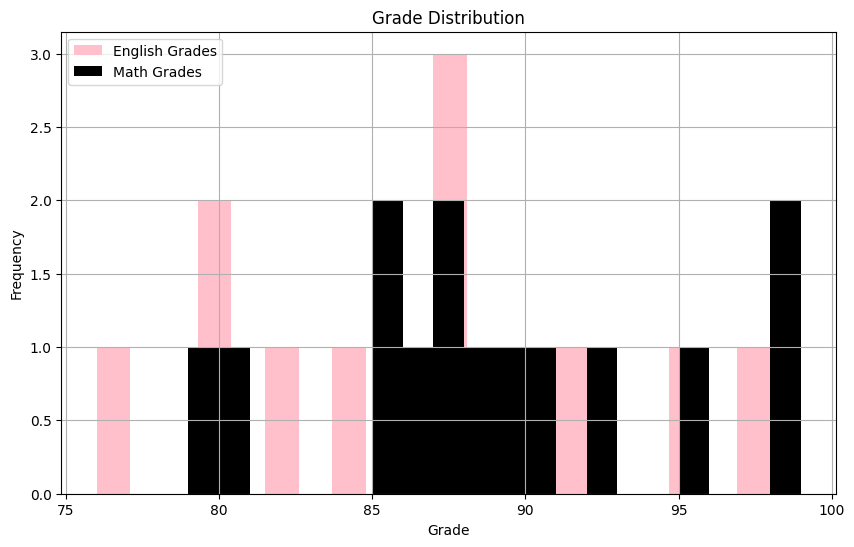

In [38]:
# Let's use matplotlib to display a histogram of the grades distribution
# Histograms are useful for seeing the distribution of the students grades

plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['englishGrade'], bins=20, alpha=1, label='English Grades', color='pink')

# Step 1: Use the line above as reference to create a histogram for the math grades
# (1 mark)
#
plt.hist(df_studentGrades['mathGrade'], bins=20, alpha=1, label='Math Grades', color='black')

# Step 2: Ensure that your plot is descriptive, so use labels (x and y axis), a title, and a legend.
# Hint: Use the matplotlib .legend(loc='<location>') to add and place the legend.
# You can use 'upper left', 'upper right', 'lower left', and 'lower right' to specify the location.
# (4 marks)
#
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade Distribution')
plt.legend(loc='upper left')
plt.grid(True)

# Step 3: Use the .savefig('<image_title>'.png) to output an image file of the histogram.
# Please be sure to use a descriptive title!
# (1 mark)
#
plt.savefig('grade_distribution.png')
plt.show()

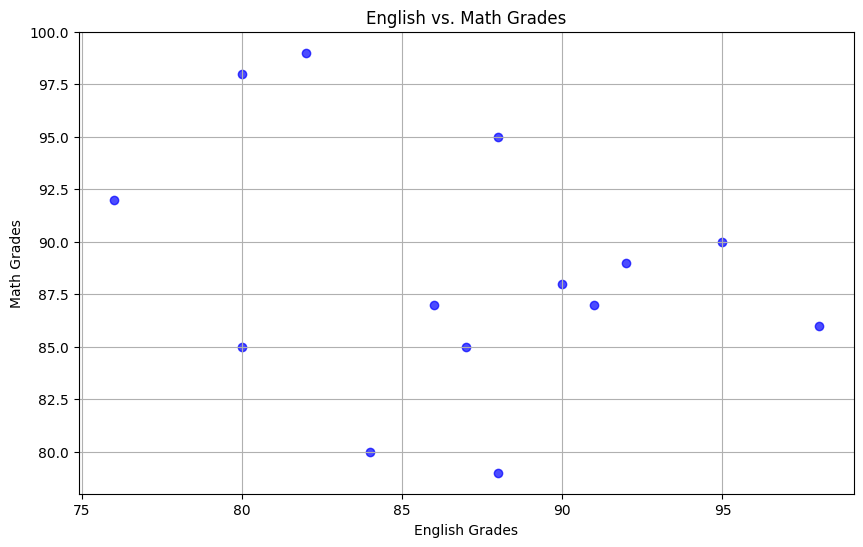

In [40]:
# Let's also use matplotlib to display a scatter plot of English vs. Math grades
# Scatter plots are useful for seeing the relationship between two variables
plt.figure(figsize=(10, 6))

# Step 1: Use .scatter(x_data, y_data) to create a scatter plot using the English grades on the x-axis, and Math grades on the y-axis
# (2 mark)
#
plt.scatter(df_studentGrades['englishGrade'], df_studentGrades['mathGrade'], alpha=0.7, label='English vs. Math Grades', color='blue')


# Step 1: Properly label the x and y axes as well as the title of your plot.
# (3 marks)
#
plt.xlabel('English Grades')
plt.ylabel('Math Grades')
plt.title('English vs. Math Grades')
plt.grid(True)

# Step 2: Output an image file for the scatter plot with a descriptive file name
# (1 mark)
#
plt.savefig('english_vs_math_grades.png')

plt.show()

In [41]:
# From the scatter plot, is there a relationship between the Math and English grades?
# (1 mark)
#Answer : Most of the student exceeded 85grades both in math and english.